# FLIGHT FARE PREDICTION

# 1. IMPORTING THE LIBRARIES :    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.LOADING THE DATASET :      

In [2]:
flight_df = pd.read_csv("/content/Clean_Dataset.csv")
flight_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


# 3.DATA PREPROCESSING :    

In [3]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78615 entries, 0 to 78614
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        78615 non-null  int64  
 1   airline           78615 non-null  object 
 2   flight            78615 non-null  object 
 3   source_city       78615 non-null  object 
 4   departure_time    78615 non-null  object 
 5   stops             78615 non-null  object 
 6   arrival_time      78615 non-null  object 
 7   destination_city  78615 non-null  object 
 8   class             78615 non-null  object 
 9   duration          78614 non-null  float64
 10  days_left         78614 non-null  float64
 11  price             78614 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 7.2+ MB


In [4]:
flight_df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            1
days_left           1
price               1
dtype: int64

In [5]:
flight_df.shape

(78615, 12)

In [8]:
flight_df.describe()

,duration,days_left,price
count,78614.000000,78614.000000,78614.000000
mean,11.110170,25.702687,6402.035108
std,7.203613,13.717825,3668.063448
min,1.170000,1.000000,1998.000000
25%,5.670000,14.000000,4020.000000
50%,9.580000,26.000000,5702.000000
75%,15.080000,38.000000,7426.000000
max,40.000000,49.000000,35145.000000


In [ ]:
flight_df.drop('Unnamed: 0',axis=1,inplace=True)

# 4.EXPLARATORY DATA ANALYSIS :    

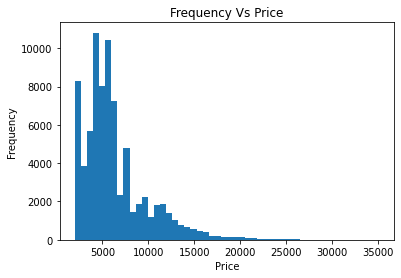

In [10]:
plt.hist(flight_df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Frequency Vs Price')
plt.show()

* This histogram shows the distribution of prices in the dataset.

* It can helps to identify the frequency of occurrence of different price ranges.

* It can be seen that the frequency of fares is high between 0 to 10,000, and then it gradually decreases with an increase in the fare price.


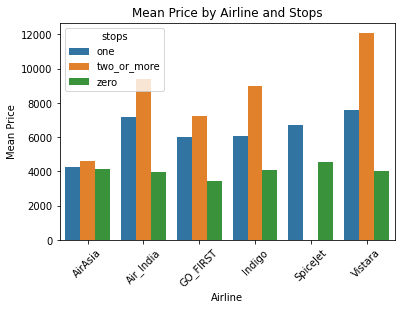

In [11]:
#Calculate the mean price by airline and stops
mean_prices = flight_df.groupby(['airline', 'stops'])['price'].mean().reset_index()

# Create a bar chart of mean price by airline and stops
sns.barplot(x='airline', y='price', hue='stops', data=mean_prices).set(title='Mean Price by Airline and Stops')
plt.xlabel('Airline')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

* Most airlines offer flights with one or two stops, with a few offering direct flights or flights with three or more stops.

* Flights with zero or one stops tend to be more expensive than flights with two or more stops.

* There is significant variation among airlines in terms of the mean price of flights, with some airlines generally offering lower-priced flights and others generally offering higher-priced flights.

<Axes: xlabel='airline', ylabel='duration'>

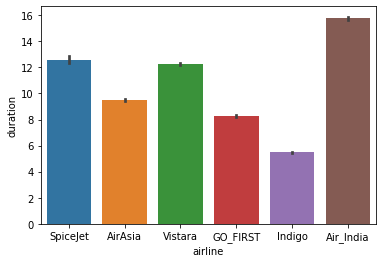

In [12]:
sns.barplot(x='airline', y='duration', data=flight_df)

* The height of each bar represents the average duration of flights for the corresponding airline.

* This plot gives us the average flight duration across different airlines and identify which airlines tend to have longer or shorter flights.


In [21]:
flight_df['class'].unique()

array(['Economy', 'Econo'], dtype=object)

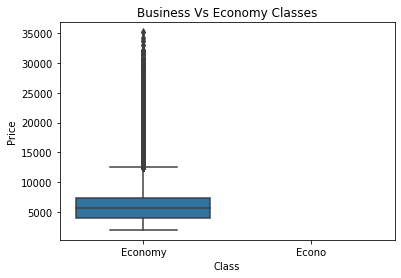

In [18]:
sns.boxplot(data=flight_df, x='class', y='price').set(title='Business Vs Economy Classes')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

* The box plot shows that the median price for "Business" class is higher than that of "Economy" class. 
* Additionally, there is a wider range of prices for "Business" class, with some flights costing much more than others. 
* In contrast, "Economy" class flights are more tightly clustered around their median price.

<function matplotlib.pyplot.show(close=None, block=None)>

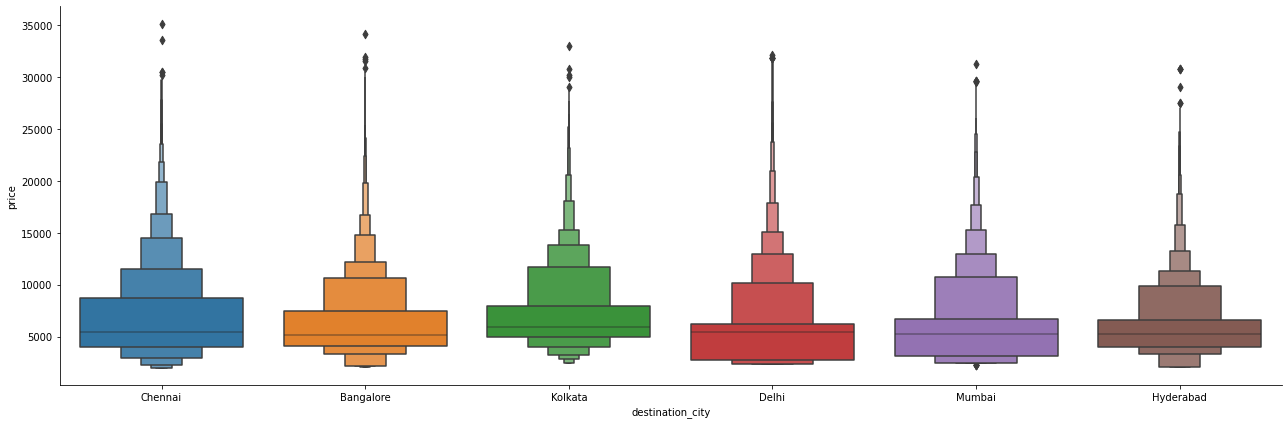

In [15]:
sns.catplot(y='price',x='destination_city',data= flight_df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

* The cities CHENNAI and KOLKATA have a wide range of price compared to all other cities.

* It is also seen that the prices for Chennai flights have the highest prices among all the other cities.

In [22]:
# Creating a backup file
fly_df = flight_df.copy()

In [ ]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])